In [11]:
# Relevant imports
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from scipy.stats import poisson
from networkx.readwrite.gexf import read_gexf

In [27]:
# Helper function for printing important network statistical properties:
def get_network_properties(G):
    # We start with general network properties related to nodes, edges and diameter:
    N = G.number_of_nodes()
    L = G.number_of_edges()
    k = [deg for node, deg in G.degree]
    k_avg = np.mean(k)
    k_min = np.min(k)
    k_max = np.max(k)
    d_avg = []
    for g in nx.connected_component_subgraphs(G):
        d_avg.append(nx.average_shortest_path_length(g))
    d_avg = max(d_avg)
    print "General Statistics:"
    print "N = %i, ln(N) = %f, L = %i, <k> = %f, k_min = %i, k_max = %i, <d> = %f" % (N, np.log(N), L, k_avg, k_min, k_max, d_avg)
    print ""
    
    # Next we consider clustering properties of the network:
    C = nx.clustering(G)
    C = [(x, y) for x, y in C.items()]
    C.sort(key=lambda x: x[1], reverse=True)
    C_avg = nx.average_clustering(G)
    print "Clustering Statistics:"
    print "<C> = %f" % C_avg
    print "Top 50 Nodes in terms of Clustering Coefficient:"
    for i in range(50):
        print "%s: C_i = %f" % (C[i][0], C[i][1])
    print ""
    
    # Finally, we print out a summary of centrality measure statistics:
    c_deg = nx.degree_centrality(G)
    c_eig = nx.eigenvector_centrality(G)
    #c_katz = nx.katz_centrality(G, tol=1e-3, max_iter=10000)
    c_pagerank = nx.pagerank(G)
    c_close = nx.closeness_centrality(G)
    c_between = nx.betweenness_centrality(G)
    
    # Converting to list of tuples and sorting:
    c_deg = [(x, y) for x, y in c_deg.items()]
    c_eig = [(x, y) for x, y in c_eig.items()]
    #c_katz = [(x, y) for x, y in c_katz.items()]
    c_pagerank = [(x, y) for x, y in c_pagerank.items()]
    c_close = [(x, y) for x, y in c_close.items()]
    c_between = [(x, y) for x, y in c_between.items()]
    
    c_deg.sort(key=lambda x: x[1], reverse=True)
    c_eig.sort(key=lambda x: x[1], reverse=True)
    #c_katz.sort(key=lambda x: x[1], reverse=True)
    c_pagerank.sort(key=lambda x: x[1], reverse=True)
    c_close.sort(key=lambda x: x[1], reverse=True)
    c_between.sort(key=lambda x: x[1], reverse=True)
    
    print "Centrality Statistics:"
    print "Top 25 Nodes in terms of Centrality Measures:"
    for i in range(25):
        vals = (c_deg[i][0], c_deg[i][1], c_eig[i][0], c_eig[i][1], c_pagerank[i][0], c_pagerank[i][1], c_close[i][0], c_close[i][1], c_between[i][0], c_between[i][1])
        print "Deg: %s (%f); Eig: %s (%f); PR: %s (%f); Clo: %s (%f); Bet: %s (%f)" % vals
    print ""
    
    deg_dist = k
    stat_gen = (N, L, k, k_avg, k_min, k_max, d_avg)
    stat_clust = (C, C_avg)
    stat_centr = (c_deg, c_eig, c_pagerank, c_close, c_between)
    
    return deg_dist, stat_gen, stat_clust, stat_centr

In [3]:
# Reading and drawing the stock network:
G = read_gexf('stock_network.gexf')

In [30]:
# Extracting relavant quantities:
N = G.number_of_nodes()
L = G.number_of_edges()

p = nx.density(G)
k_avg = (N - 1)*p
m = int(k_avg / 2)

k = [k for n, k in G.degree()]

print "Stock network: N = %i, ln(N) = %f, L = %i, <k> = %f, k_min = %i, k_max = %i, p = %f" % (N, np.log(N), L, k_avg, np.min(k), np.max(k), p)

Stock network: N = 1955, ln(N) = 7.578145, L = 139561, <k> = 142.773402, k_min = 0, k_max = 570, p = 0.073067


71

In [ ]:
# Generating a ER graph with the same number of edges:
N_iter = 0
G_ER = nx.fast_gnp_random_graph(N, p)
while G_ER.number_of_edges() != L:
    N_iter += 1
    G_ER = nx.fast_gnp_random_graph(N, p)
print "ER graph with same number of nodes and edges found after %i iterations." % N_iter

nx.write_gexf(G_ER, "synthetic_ER_network.gexf")
print "ER graph saved!"

In [ ]:
# Finding a BA graph with the (approximately) the same number of edges:
N_iter = 0
G_BA = nx.barabasi_albert_graph(N, m)
while np.abs(G_BA.number_of_edges() - L) > 500:
    N_iter += 1
    G_BA = nx.barabasi_albert_graph(N, m + N_iter)

print "BA graph with same number of nodes and edges found after %i iterations." % N_iter
nx.write_gexf(G_BA, "synthetic_BA_network.gexf")
print "BA graph saved!"

In [5]:
# Loading the pre-computed ER and BA graphs:
G_ER = read_gexf("synthetic_ER_network.gexf")
G_BA = read_gexf("synthetic_BA_network.gexf")
print "Synthetic network data loaded!"

Synthetic network data loaded!


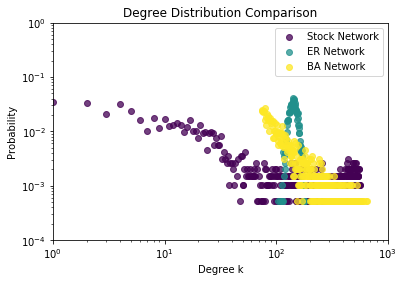

In [38]:
# Plotting the results:
k_stock, p_stock = np.unique(k, return_counts=True)
p_stock = p_stock / float(N)

k_ER = [k_ER for n, k_ER in G_ER.degree()]
k_ER, p_ER = np.unique(k_ER, return_counts=True)
p_ER = p_ER / float(N)

k_BA = [k_BA for n, k_BA in G_BA.degree()]
k_BA, p_BA = np.unique(k_BA, return_counts=True)
p_BA = p_BA / float(N)

plt.scatter(k_stock, p_stock, alpha=0.75, label="Stock Network", c="#440154")
plt.scatter(k_ER, p_ER, alpha=0.75, label="ER Network", c="#21908C")
plt.scatter(k_BA, p_BA, alpha=0.75, label="BA Network", c="#FDE725")
plt.semilogx()
plt.semilogy()

plt.xlim(1, 1000)
plt.ylim(1e-4, 1)
plt.legend()
plt.title('Degree Distribution Comparison')
plt.xlabel('Degree k')
plt.ylabel('Probability')
plt.show()

In [28]:
# Printing out summaries of network properties:
print "Stock Network Properties"
deg_dist_stock, stat_gen_stock, stat_clust_stock, stat_centr_stock = get_network_properties(G)
print "Synthetic ER Network Properties"
deg_dist_ER, stat_gen_ER, stat_clust_ER, stat_centr_ER = get_network_properties(G_ER)
print "Synthetic BA Network Properties"
deg_dist_BA, stat_gen_BA, stat_clust_BA, stat_centr_BA = get_network_properties(G_BA)

Stock Network Properties
General Statistics:
N = 1955, ln(N) = 7.578145, L = 139561, <k> = 142.773402, k_min = 0, k_max = 570, <d> = 3.856325

Clustering Statistics:
<C> = 0.574461
Top 50 Nodes in terms of Clustering Coefficient:
BDMS.BK: C_i = 1.000000
VIE.PA: C_i = 1.000000
2885.TW: C_i = 1.000000
600751.SS: C_i = 1.000000
BBL.BK: C_i = 1.000000
3328.hk: C_i = 1.000000
sail.ns: C_i = 1.000000
GARAN.IS: C_i = 1.000000
AUB.BH: C_i = 1.000000
WYNN: C_i = 1.000000
NAB.AX: C_i = 1.000000
051910.KS: C_i = 1.000000
AEM: C_i = 1.000000
COLR.BR: C_i = 1.000000
FEMSAUBD.MX: C_i = 1.000000
000150.KS: C_i = 1.000000
IDEA.NS: C_i = 1.000000
ISCTR.IS: C_i = 1.000000
0754.HK: C_i = 1.000000
EFGN.SW: C_i = 1.000000
FIVE.IL: C_i = 1.000000
ebk.f: C_i = 1.000000
SCC.BK: C_i = 1.000000
EGS60111C019.CA: C_i = 1.000000
IDKOY: C_i = 1.000000
CABK.mc: C_i = 1.000000
1180.SR: C_i = 1.000000
ffh.to: C_i = 1.000000
300226.SZ: C_i = 1.000000
EUROB.AT: C_i = 1.000000
TPEIR.AT: C_i = 1.000000
ONGC.NS: C_i = 1.00

Clustering Statistics:
<C> = 0.142679
Top 50 Nodes in terms of Clustering Coefficient:
1830: C_i = 0.217116
1474: C_i = 0.213924
1779: C_i = 0.213333
7: C_i = 0.209497
1606: C_i = 0.201233
1562: C_i = 0.199932
871: C_i = 0.198614
1827: C_i = 0.198198
1271: C_i = 0.198015
1644: C_i = 0.197881
65: C_i = 0.196285
1908: C_i = 0.194743
1514: C_i = 0.194205
1615: C_i = 0.192593
653: C_i = 0.192517
1194: C_i = 0.192380
526: C_i = 0.192266
1430: C_i = 0.191772
59: C_i = 0.191283
52: C_i = 0.190714
1491: C_i = 0.189902
492: C_i = 0.189878
601: C_i = 0.189651
1766: C_i = 0.188995
41: C_i = 0.188386
1875: C_i = 0.188070
1869: C_i = 0.187708
1890: C_i = 0.186968
38: C_i = 0.186773
1148: C_i = 0.186770
839: C_i = 0.186139
19: C_i = 0.185792
1812: C_i = 0.185578
734: C_i = 0.185234
1658: C_i = 0.184952
1481: C_i = 0.184692
707: C_i = 0.184603
42: C_i = 0.184602
1454: C_i = 0.184594
1427: C_i = 0.184431
454: C_i = 0.184258
1025: C_i = 0.183232
1611: C_i = 0.183185
712: C_i = 0.183076
25: C_i = 0.1830

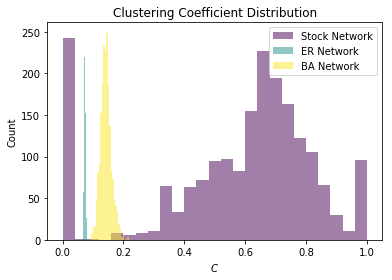

In [37]:
# Plotting the clustering coefficient statistics:
C_stock = stat_clust_stock[0]
C_stock = [C for node, C in C_stock]

C_ER = stat_clust_ER[0]
C_ER = [C for node, C in C_ER]

C_BA = stat_clust_BA[0]
C_BA = [C for node, C in C_BA]

plt.hist(C_stock, bins=25, alpha=0.5, color="#440154", label="Stock Network")
plt.hist(C_ER, bins=25, alpha=0.5, color="#21908C", label="ER Network")
plt.hist(C_BA, bins=25, alpha=0.5, color="#FDE725", label="BA Network")
plt.title("Clustering Coefficient Distribution")
plt.xlabel("$C$")
plt.ylabel("Count")
plt.legend()
plt.show()

In [48]:
# Printing the average centrality statistics:
c_types = ["Deg", "Eig", "PR", "Clo", "Bet"]
print "Average Centrality Statistics:"

for i in range(len(c_types)):
    c_stock = stat_centr_stock[i]
    c_stock_avg = np.mean([c for node, c in c_stock])

    c_ER = stat_centr_ER[i]
    c_ER_avg = np.mean([c for node, c in c_ER])

    c_BA = stat_centr_BA[i]
    c_BA_avg = np.mean([c for node, c in c_BA])
    print "%s: Stock=%f, ER=%f, BA=%f" % (c_types[i], c_stock_avg, c_ER_avg, c_BA_avg)

Average Centrality Statistics:
Deg: Stock=0.073067, ER=0.073067, BA=0.072875
Eig: Stock=0.012882, ER=0.022544, BA=0.018955
PR: Stock=0.000512, ER=0.000512, BA=0.000512
Clo: Stock=0.219011, ER=0.518958, BA=0.518930
Bet: Stock=0.001128, ER=0.000475, BA=0.000475
